In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.family'] = "AppleGothic"

from sklearn.ensemble import RandomForestRegressor

from scipy import stats
import scipy 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pycaret.regression import *
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import pandas_profiling
import statsmodels.api as sm
from sklearn.decomposition import PCA

In [2]:
grid_500 = pd.read_csv('/Users/gimdong-wan/Desktop/DataCampus/data/final_data/500grid_data.csv')

In [3]:
grid_500.head(3)

,INDEX,ID,총인구,남성인구,여성인구,고등여성인구,20대여성인구,유소년인구,고령인구,30년이상35년미만건축물,35년이상건축물,개별주택가격,공시지가,행정동코드,가로등,공영주차장,공중화장실,교육시설,교통사고_19,교통사고_20,노숙인시설,대규모점포,대부업현황,룸살롱,버스정류장,보안등,상가,숙박업소,술집,어린이보호,어린이집,오락시설,원룸_오피스텔,유흥시설,음식점,자율방범대,파출소,cctv,신호등,횡단보도,GRADE_폭력,GRADE_절도,GRADE_성폭력
0,0,다마66a58a,1758,829,929,37,114,173,282,0,3,1.784059e+08,162445.31,중화산2동,8,1,4,10,9,4,0,0,0,0,0,22,30,0,1,0,2,0,12,10,10,0,0,3,0,1,5,3,0
1,1,다마68a60b,2551,1281,1270,37,170,218,643,81,381,9.432807e+07,429815.61,인후2동,30,0,2,4,6,13,0,0,0,0,1,7,92,0,2,3,2,3,69,26,23,1,0,11,7,45,6,5,3
2,2,다마69b61b,169,87,82,0,0,0,75,7,27,7.005660e+07,106154.66,우아1동,0,0,0,0,0,0,0,0,0,0,0,2,17,0,0,0,0,0,1,10,10,0,0,1,0,0,2,3,0


In [4]:
grid_500['성폭력취약인구'] = grid_500['고등여성인구']+grid_500['20대여성인구']
grid_500['GRADE_폭력'] = grid_500['GRADE_폭력'].apply(lambda x: x-1 if x>0 else x)
grid_500['GRADE_절도'] = grid_500['GRADE_절도'].apply(lambda x: x-1 if x>0 else x)
grid_500['GRADE_성폭력'] = grid_500['GRADE_성폭력'].apply(lambda x: x-1 if x>0 else x)

In [5]:
grid_500.describe()

,INDEX,총인구,남성인구,여성인구,고등여성인구,20대여성인구,유소년인구,고령인구,30년이상35년미만건축물,35년이상건축물,개별주택가격,공시지가,가로등,공영주차장,공중화장실,교육시설,교통사고_19,교통사고_20,노숙인시설,대규모점포,대부업현황,룸살롱,버스정류장,보안등,상가,숙박업소,술집,어린이보호,어린이집,오락시설,원룸_오피스텔,유흥시설,음식점,자율방범대,파출소,cctv,신호등,횡단보도,GRADE_폭력,GRADE_절도,GRADE_성폭력,성폭력취약인구
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,9.180000e+02,9.180000e+02,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.00000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,458.500000,714.693900,351.464052,362.875817,10.930283,46.836601,82.391068,122.736383,5.587146,24.537037,8.729869e+07,1.898196e+05,16.093682,0.087146,0.352941,4.028322,2.983660,2.469499,0.003268,0.041394,0.094771,0.299564,0.619826,11.122004,36.741830,0.449891,1.545752,0.267974,0.66122,0.899782,9.514161,13.901961,13.002179,0.052288,0.020697,1.464052,4.141612,7.485839,1.172113,1.425926,0.614379,57.766885
std,265.148072,1532.693288,746.379116,787.240988,27.950095,106.057666,215.078664,260.815712,23.184117,77.426084,1.060985e+08,2.976483e+05,30.342177,0.411169,1.039906,12.948150,5.882599,9.154237,0.057104,0.273168,0.402764,2.587323,1.345585,27.225147,90.192462,2.628423,5.550755,0.717501,1.99280,3.132616,30.737239,36.834671,34.119266,0.241520,0.142446,2.832725,8.246316,15.055742,2.041768,2.332377,1.592475,132.421282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,229.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.256998e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,458.500000,24.000000,13.000000,11.500000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,6.405639e+07,5.336395e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,687.750000,291.000000,153.750000,137.500000,0.000000,16.000000,21.000000,58.000000,1.000000,8.000000,1.220900e+08,2.356136e+05,20.750000,0.000000,0.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.750000,7.000000,17.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,5.000000,5.000000,0.000000,0.000000,1.000000,4.000000,8.000000,1.000000,2.000000,0.000000,16.750000
max,917.000000,8753.000000,4173.000000,4580.000000,186.000000,649.000000,1996.000000,1573.000000,402.000000,682.000000,5.610000e+08,2.312433e+06,196.000000,6.000000,10.000000,126.000000,43.000000,128.000000,1.000000,4.000000,4.000000,43.000000,11.000000,196.000000,1114.000000,28.000000,77.000000,6.000000,25.00000,40.000000,288.000000,354.000000,328.000000,2.000000,1.000000,14.000000,54.000000,146.000000,10.000000,10.000000,10.000000,815.000000


### 행정동별로 평균 범죄주의구간 등급 확인

In [6]:
#grid_500[['GRADE_폭력','GRADE_절도','GRADE_성폭력']].groupby(grid_500['행정동코드']).mean().sort_values('GRADE_폭력', ascending=False)
#grid_500[['GRADE_폭력','GRADE_절도','GRADE_성폭력']].groupby(grid_500['행정동코드']).mean().sort_values('GRADE_절도', ascending=False)
#grid_500[['GRADE_폭력','GRADE_절도','GRADE_성폭력']].groupby(grid_500['행정동코드']).mean().sort_values('GRADE_성폭력', ascending=False)
dong_rank = grid_500[['GRADE_폭력','GRADE_절도','GRADE_성폭력']].groupby(grid_500['행정동코드']).mean()
dong_rank.mean(axis=1).sort_values(ascending=False)

행정동코드
금암1동     5.750000
인후3동     5.133333
효자3동     4.777778
인후1동     4.733333
중앙동      4.733333
진북동      4.611111
평화1동     4.583333
중화산1동    4.533333
효자2동     4.444444
인후2동     4.166667
삼천2동     4.000000
금암2동     3.722222
중화산2동    3.541667
덕진동      3.460317
서신동      3.458333
완산동      3.444444
노송동      3.166667
우아1동     2.814815
효자1동     2.466667
효자5동     2.410256
풍남동      2.370370
삼천1동     2.333333
송천1동     2.314815
효자4동     1.219048
팔복동      1.089744
혁신동      0.900000
여의동      0.893939
서서학동     0.871795
송천2동     0.790123
평화2동     0.758454
호성동      0.720721
우아2동     0.581761
삼천3동     0.270833
조촌동      0.166667
동서학동     0.134259
dtype: float64

### 랭킹 
- 폭력
    - 인후1동, 인후3동, 금암1동, 평화1동, 인후2동
- 절도
    - 중앙동, 효자3동, 금암1동, 평화1동, 서신동
- 성폭력
    - 금암1동, 중화산1동, 효자2동, 완산동, 인후3동
- 평균
    - 금암1동, 인후3동, 효자3동, 인후1동, 중앙동

### 다양한 t-test or anova test 해보기 

In [7]:
violence_Y = grid_500[grid_500['GRADE_폭력']>0]
violence_N = grid_500[grid_500['GRADE_폭력']==0]

### 인구

In [8]:
x1 = np.array(violence_Y['총인구'])
x2 = np.array(violence_N['총인구'])
print('x1_mean',x1.mean(),'/ x2_mean',x2.mean())

x1_mean 1861.0545454545454 / x2_mean 71.328231292517


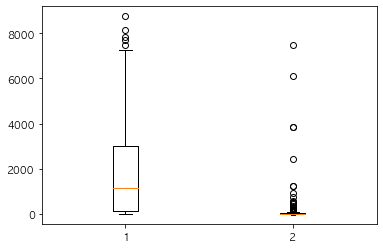

In [9]:
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()

In [10]:
print(stats.levene(np.array(violence_Y['총인구']), np.array(violence_N['총인구'])))

LeveneResult(statistic=553.8441959813368, pvalue=3.714560161405709e-96)


In [11]:
scipy.stats.ttest_ind(np.array(violence_Y['총인구']), np.array(violence_N['총인구']), equal_var=False)

Ttest_indResult(statistic=15.83713901427551, pvalue=5.811617931115466e-43)

### 남성인구

x1_mean 914.4272727272727 / x2_mean 35.515306122448976


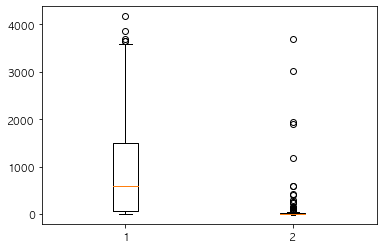

LeveneResult(statistic=590.1226571159439, pvalue=5.148633117123281e-101)


Ttest_indResult(statistic=16.055500602662672, pvalue=7.22567582750133e-44)

In [12]:
x1 = np.array(violence_Y['남성인구'])
x2 = np.array(violence_N['남성인구'])
print('x1_mean',x1.mean(),'/ x2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 946.3787878787879 / x2_mean 35.39965986394558


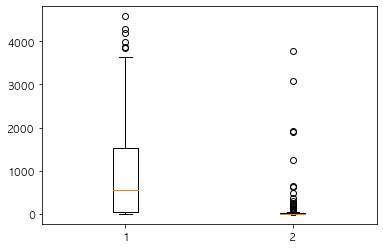

LeveneResult(statistic=533.8998687886028, pvalue=1.9603024386567307e-93)


Ttest_indResult(statistic=15.609436307946174, pvalue=5.041185942887489e-42)

In [13]:
x1 = np.array(violence_Y['여성인구'])
x2 = np.array(violence_N['여성인구'])
print('x1_mean',x1.mean(),'/ x2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 207.64242424242425 / x2_mean 12.096938775510203


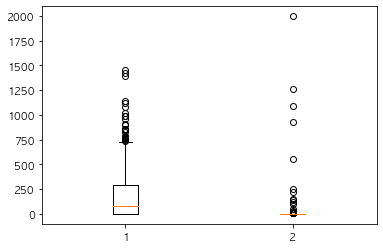

LeveneResult(statistic=221.5714727625812, pvalue=4.8312293161221844e-45)


Ttest_indResult(statistic=11.999224152114076, pvalue=1.7655447902447325e-28)

In [14]:
x1 = np.array(violence_Y['유소년인구'])
x2 = np.array(violence_N['유소년인구'])
print('x1_mean',x1.mean(),'/ x2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 322.3333333333333 / x2_mean 10.717687074829932


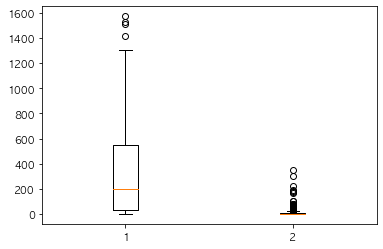

LeveneResult(statistic=621.9518436448641, pvalue=3.508537846178945e-105)


Ttest_indResult(statistic=15.937252204028084, pvalue=7.466348058814082e-43)

In [15]:
x1 = np.array(violence_Y['고령인구'])
x2 = np.array(violence_N['고령인구'])
print('x1_mean',x1.mean(),'/ x2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 154.36060606060607 / x2_mean 3.556122448979592


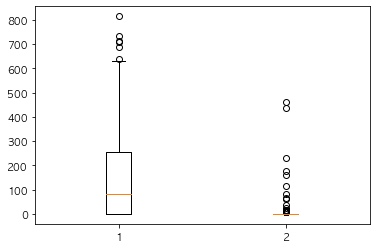

LeveneResult(statistic=516.8564216491457, pvalue=4.454077824467434e-91)


Ttest_indResult(statistic=15.048144555938256, pvalue=1.4505320535101325e-39)

In [16]:
x1 = np.array(violence_Y['성폭력취약인구'])
x2 = np.array(violence_N['성폭력취약인구'])
print('x1_mean',x1.mean(),'/ x2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

#### 폭력주의구간 유무에 따른 데이터의 총 인구수의 차이는 플랏으로도 충분한 차이를 보이며, 인구가 없는 곳보다 인구가 많이 분포하는 곳에 범죄가 많이 발생했음을 알 수 있다.

### 토지

x1_mean 14.745454545454546 / x2_mean 0.44727891156462585


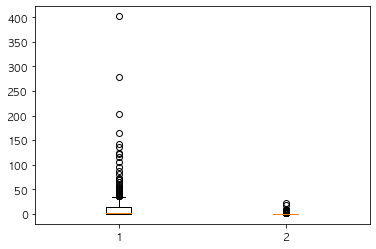

LeveneResult(statistic=87.11406228977752, pvalue=7.522219322343875e-20)


Ttest_indResult(statistic=7.033502359272243, pvalue=1.1684572020933228e-11)

In [17]:
x1 = np.array(violence_Y['30년이상35년미만건축물'])
x2 = np.array(violence_N['30년이상35년미만건축물'])
print('x1_mean',x1.mean(),'/ x2_mean',x2.mean())

plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 63.19090909090909 
x2_mean 2.8435374149659864


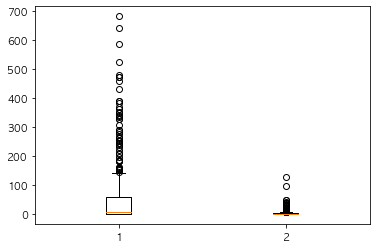

LeveneResult(statistic=147.07601305614284, pvalue=1.69494542481985e-31)


Ttest_indResult(statistic=9.175671719362914, pvalue=4.946389537202972e-18)

In [18]:
x1 = np.array(violence_Y['35년이상건축물'])
x2 = np.array(violence_N['35년이상건축물'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 164826159.9820606 
x2_mean 43788382.64129251


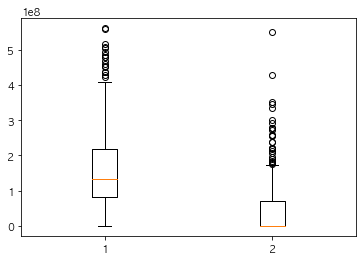

LeveneResult(statistic=77.63948697646883, pvalue=6.1143625194786045e-18)


Ttest_indResult(statistic=17.104882636551853, pvalue=7.346670490214717e-51)

In [19]:
x1 = np.array(violence_Y['개별주택가격'])
x2 = np.array(violence_N['개별주택가격'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 418558.56551515154 
x2_mean 61445.665527210884


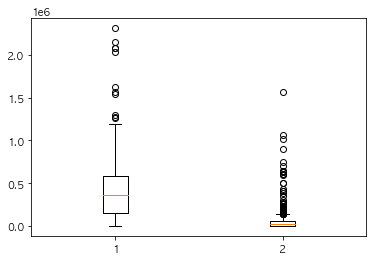

LeveneResult(statistic=260.87413097926634, pvalue=7.946154650676373e-52)


Ttest_indResult(statistic=17.181267797227886, pvalue=2.1363786751606397e-49)

In [20]:
x1 = np.array(violence_Y['공시지가'])
x2 = np.array(violence_N['공시지가'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

### 건물

x1_mean 39.8 
x2_mean 2.7891156462585034


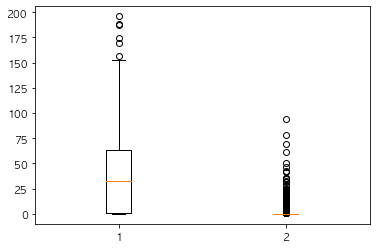

LeveneResult(statistic=565.2195401737431, pvalue=1.0807827119000978e-97)


Ttest_indResult(statistic=16.901875237028104, pvalue=2.905564795017669e-47)

In [21]:
x1 = np.array(violence_Y['가로등'])
x2 = np.array(violence_N['가로등'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 0.23333333333333334 
x2_mean 0.00510204081632653


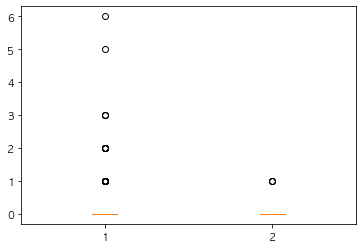

LeveneResult(statistic=70.02894446805433, pvalue=2.1669981743952014e-16)


Ttest_indResult(statistic=6.31144038887264, pvalue=8.80686394316779e-10)

In [22]:
x1 = np.array(violence_Y['공영주차장'])
x2 = np.array(violence_N['공영주차장'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 0.9090909090909091 
x2_mean 0.04081632653061224


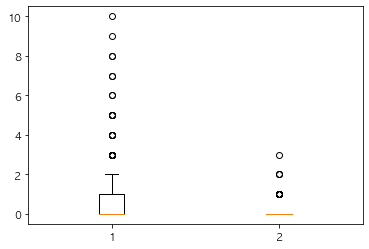

LeveneResult(statistic=175.38074941170703, pvalue=9.34158823578976e-37)


Ttest_indResult(statistic=10.063030811922243, pvalue=5.2119517367816146e-21)

In [23]:
x1 = np.array(violence_Y['공중화장실'])
x2 = np.array(violence_N['공중화장실'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 11.00909090909091 
x2_mean 0.11054421768707483


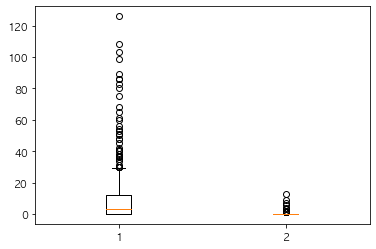

LeveneResult(statistic=182.85512016127578, pvalue=4.0305021293837613e-38)


Ttest_indResult(statistic=10.022980327576343, pvalue=8.178662438707835e-21)

In [24]:
x1 = np.array(violence_Y['교육시설'])
x2 = np.array(violence_N['교육시설'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 0.006060606060606061 
x2_mean 0.0017006802721088435


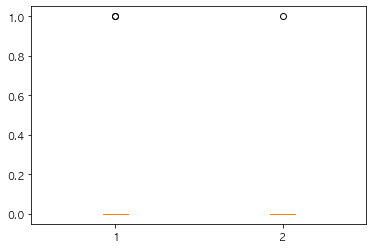

LeveneResult(statistic=1.232498914262359, pvalue=0.26721295519420557)


Ttest_indResult(statistic=0.9468715084235213, pvalue=0.34422985850739807)

In [25]:
x1 = np.array(violence_Y['노숙인시설'])
x2 = np.array(violence_N['노숙인시설'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

- 제거해야할 것 같다

x1_mean 0.11515151515151516 
x2_mean 0.0


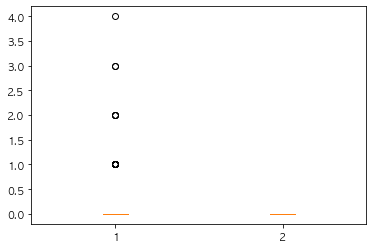

LeveneResult(statistic=39.121821663032904, pvalue=6.101793043554015e-10)


Ttest_indResult(statistic=4.683736175165282, pvalue=4.127092017274646e-06)

In [26]:
x1 = np.array(violence_Y['대규모점포'])
x2 = np.array(violence_N['대규모점포'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

- 대규모점포가 있는 곳은 폭력주의등급이 0보다 크다

x1_mean 0.2606060606060606 
x2_mean 0.0017006802721088435


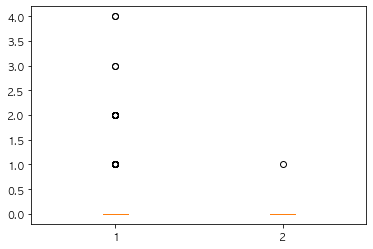

LeveneResult(statistic=96.43301587131688, pvalue=1.0409326450421441e-21)


Ttest_indResult(statistic=7.372293713653495, pvalue=1.3579161403166172e-12)

In [27]:
x1 = np.array(violence_Y['대부업현황'])
x2 = np.array(violence_N['대부업현황'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 0.8333333333333334 
x2_mean 0.0


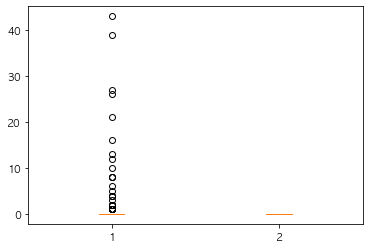

LeveneResult(statistic=22.439947764777155, pvalue=2.5118352251551112e-06)


Ttest_indResult(statistic=3.5472664431052507, pvalue=0.0004457983678154582)

In [28]:
x1 = np.array(violence_Y['룸살롱'])
x2 = np.array(violence_N['룸살롱'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

- 룸살롱이 있는 곳은 폭력주의등급이 0보다 크다

x1_mean 1.5393939393939393 
x2_mean 0.10374149659863946


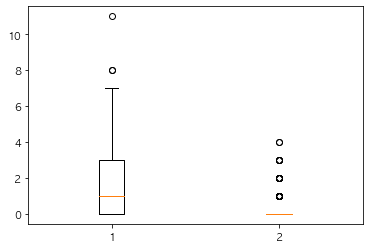

LeveneResult(statistic=442.29363649868174, pvalue=1.9978774380044617e-80)


Ttest_indResult(statistic=14.015336158399727, pvalue=8.783542393102655e-36)

In [29]:
x1 = np.array(violence_Y['버스정류장'])
x2 = np.array(violence_N['버스정류장'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 25.766666666666666 
x2_mean 2.9030612244897958


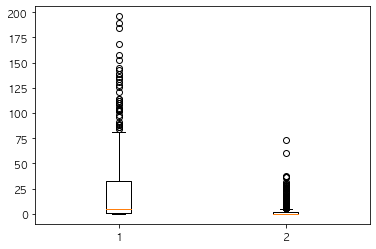

LeveneResult(statistic=173.65728986615602, pvalue=1.934422017820353e-36)


Ttest_indResult(statistic=10.187687165146919, pvalue=1.84910552864163e-21)

In [30]:
x1 = np.array(violence_Y['보안등'])
x2 = np.array(violence_N['보안등'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 98.65757575757576 
x2_mean 1.9931972789115646


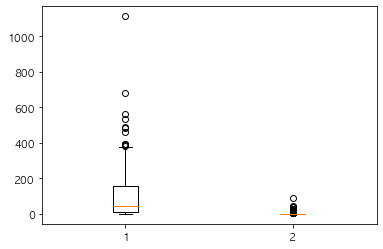

LeveneResult(statistic=333.2957262497059, pvalue=9.592711865041301e-64)


Ttest_indResult(statistic=13.619663710323614, pvalue=7.989820485013028e-34)

In [31]:
x1 = np.array(violence_Y['상가'])
x2 = np.array(violence_N['상가'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 1.2333333333333334 
x2_mean 0.01020408163265306


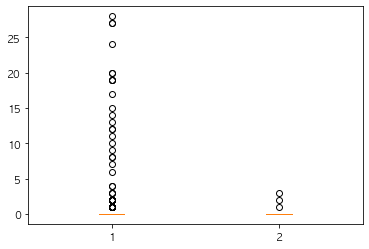

LeveneResult(statistic=48.12452244055346, pvalue=7.556665674907268e-12)


Ttest_indResult(statistic=5.198895298872616, pvalue=3.5258139068955725e-07)

In [32]:
x1 = np.array(violence_Y['숙박업소'])
x2 = np.array(violence_N['숙박업소'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 4.2272727272727275 
x2_mean 0.04081632653061224


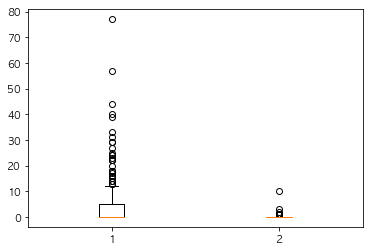

LeveneResult(statistic=138.23048791384463, pvalue=7.990874781293573e-30)


Ttest_indResult(statistic=8.819009516732175, pvalue=6.792886219619867e-17)

In [33]:
x1 = np.array(violence_Y['술집'])
x2 = np.array(violence_N['술집'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 0.6757575757575758 
x2_mean 0.0391156462585034


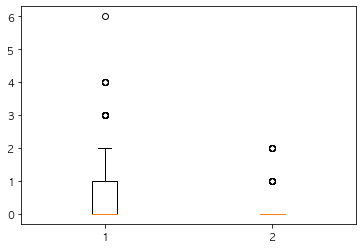

LeveneResult(statistic=203.0907870748539, pvalue=9.060732207682194e-42)


Ttest_indResult(statistic=11.030596280323103, pvalue=1.7406627575858613e-24)

In [34]:
x1 = np.array(violence_Y['어린이보호'])
x2 = np.array(violence_N['어린이보호'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 2.478787878787879 
x2_mean 0.013605442176870748


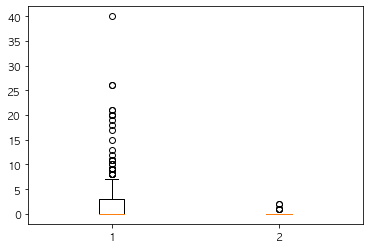

LeveneResult(statistic=152.52775975252476, pvalue=1.603327753233265e-32)


Ttest_indResult(statistic=9.253092236364873, pvalue=2.845716943654849e-18)

In [35]:
x1 = np.array(violence_Y['오락시설'])
x2 = np.array(violence_N['오락시설'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 25.954545454545453 
x2_mean 0.28741496598639454


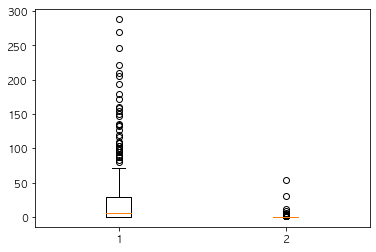

LeveneResult(statistic=178.3491912705122, pvalue=2.673833686433658e-37)


Ttest_indResult(statistic=9.937465021606151, pvalue=1.5713031156059078e-20)

In [36]:
x1 = np.array(violence_Y['원룸_오피스텔'])
x2 = np.array(violence_N['원룸_오피스텔'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 37.40909090909091 
x2_mean 0.7091836734693877


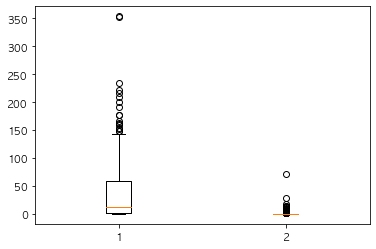

LeveneResult(statistic=279.04099415733924, pvalue=6.950159938155569e-55)


Ttest_indResult(statistic=12.379118313277875, pvalue=3.524823785896248e-29)

In [37]:
x1 = np.array(violence_Y['유흥시설'])
x2 = np.array(violence_N['유흥시설'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 34.93030303030303 
x2_mean 0.6955782312925171


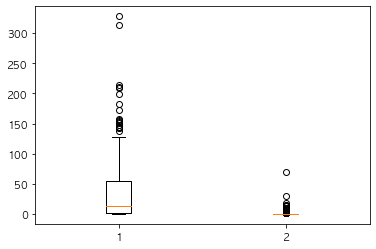

LeveneResult(statistic=288.23179832398455, pvalue=2.0548141545579948e-56)


Ttest_indResult(statistic=12.497282746632168, pvalue=1.277733340568357e-29)

In [38]:
x1 = np.array(violence_Y['음식점'])
x2 = np.array(violence_N['음식점'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 0.14242424242424243 
x2_mean 0.0017006802721088435


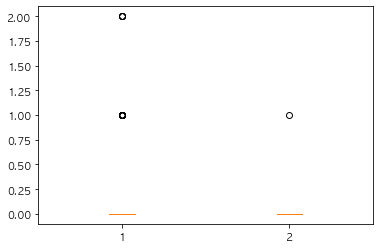

LeveneResult(statistic=77.76646774427334, pvalue=5.762557244630546e-18)


Ttest_indResult(statistic=6.649881532891946, pvalue=1.2019727573602088e-10)

In [39]:
x1 = np.array(violence_Y['자율방범대'])
x2 = np.array(violence_N['자율방범대'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 0.05757575757575758 
x2_mean 0.0


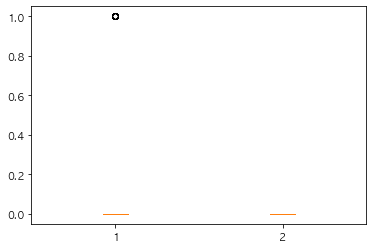

LeveneResult(statistic=35.8445663367169, pvalue=3.0653571835850133e-09)


Ttest_indResult(statistic=4.483266494041107, pvalue=1.0165138377921365e-05)

In [40]:
x1 = np.array(violence_Y['파출소'])
x2 = np.array(violence_N['파출소'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 3.7303030303030305 
x2_mean 0.1921768707482993


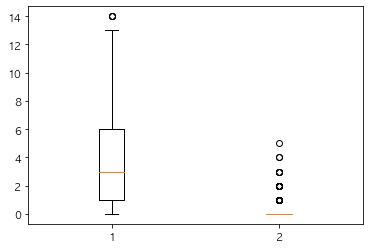

LeveneResult(statistic=721.0028965158072, pvalue=1.2936323309966932e-117)


Ttest_indResult(statistic=17.22940255349813, pvalue=3.44305821466709e-48)

In [41]:
x1 = np.array(violence_Y['cctv'])
x2 = np.array(violence_N['cctv'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 9.8 
x2_mean 0.9659863945578231


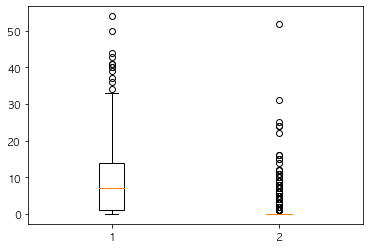

LeveneResult(statistic=359.7889891532996, pvalue=6.251106159966078e-68)


Ttest_indResult(statistic=14.57539839532528, pvalue=1.6652446536605456e-38)

In [42]:
x1 = np.array(violence_Y['신호등'])
x2 = np.array(violence_N['신호등'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

x1_mean 18.684848484848484 
x2_mean 1.2006802721088434


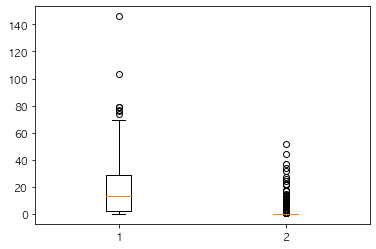

LeveneResult(statistic=414.64804962358136, pvalue=2.5130852615211485e-76)


Ttest_indResult(statistic=15.737119660297662, pvalue=1.3663529320680941e-42)

In [43]:
x1 = np.array(violence_Y['횡단보도'])
x2 = np.array(violence_N['횡단보도'])
print('x1_mean',x1.mean(),'\nx2_mean',x2.mean())
plot_sp= [x1, x2]
ax = plt.boxplot(plot_sp)
plt.show()
print(stats.levene(x1,x2))
scipy.stats.ttest_ind(x1,x2, equal_var=False)

In [44]:
print(len(grid_500[grid_500['GRADE_폭력']==0]))
print(len(grid_500[grid_500['GRADE_폭력']>0]))

588
330


In [45]:
violence_low = grid_500.query('GRADE_폭력<=4 & GRADE_폭력>=1')
violence_mid = grid_500.query('GRADE_폭력<8 & GRADE_폭력>=5')
violence_high = grid_500.query('GRADE_폭력<=10 & GRADE_폭력>=8')

In [46]:
print(len(violence_low),len(violence_mid),len(violence_high),len(violence_N))

235 85 10 588


In [47]:
len(grid_500.query('GRADE_폭력==0 & GRADE_절도==0 & GRADE_성폭력==0'))

523

### 3개의 범죄주의등급이 모두 0인 경우가 523개임 .. 


In [48]:
len(grid_500.query('GRADE_폭력!=0 & GRADE_절도!=0 & GRADE_성폭력!=0'))

136

### 3개의 범죄주의등급이 모두 0보다 큰 경우가 136개 


In [49]:
len(grid_500.query('GRADE_폭력!=0 | GRADE_절도!=0 | GRADE_성폭력!=0'))

395

### 3개의 범죄주의등급이 한개라도 0보다 큰 경우가 395

## 아무래도 나눠서 분석해보는게 좋을듯 .....?

In [61]:
grid_500.columns

Index(['INDEX', 'ID', '총인구', '남성인구', '여성인구', '고등여성인구', '20대여성인구', '유소년인구',
       '고령인구', '30년이상35년미만건축물', '35년이상건축물', '개별주택가격', '공시지가', '행정동코드', '가로등',
       '공영주차장', '공중화장실', '교육시설', '교통사고_19', '교통사고_20', '노숙인시설', '대규모점포',
       '대부업현황', '룸살롱', '버스정류장', '보안등', '상가', '숙박업소', '술집', '어린이보호', '어린이집',
       '오락시설', '원룸_오피스텔', '유흥시설', '음식점', '자율방범대', '파출소', 'cctv', '신호등', '횡단보도',
       'GRADE_폭력', 'GRADE_절도', 'GRADE_성폭력', '성폭력취약인구'],
      dtype='object')

In [60]:
len(grid_500.query('총인구 == 0 &가로등==0 & 공중화장실==0 & 상가==0 & cctv==0 &  원룸_오피스텔 ==0 & 신호등==0 & 횡단보도==0'))

286